C:\Users\josep\AppData\Local\Temp\ipykernel_9540\433147122.py:76: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=d['weight']*0.5, alpha=0.6, label=f"{d['weight']}")


   Language 1            Language 2  Weight
0      Arabic  Chinese (Simplified)       2
1      Arabic                 Dutch       1
2      Arabic               English       2
3      Arabic                French       2
4      Arabic                German       2
..        ...                   ...     ...
61    Russian               Swedish       1
62    Russian             Ukrainian       1
63    Spanish               Swedish       2
64    Spanish             Ukrainian       1
65    Swedish             Ukrainian       1

[66 rows x 3 columns]


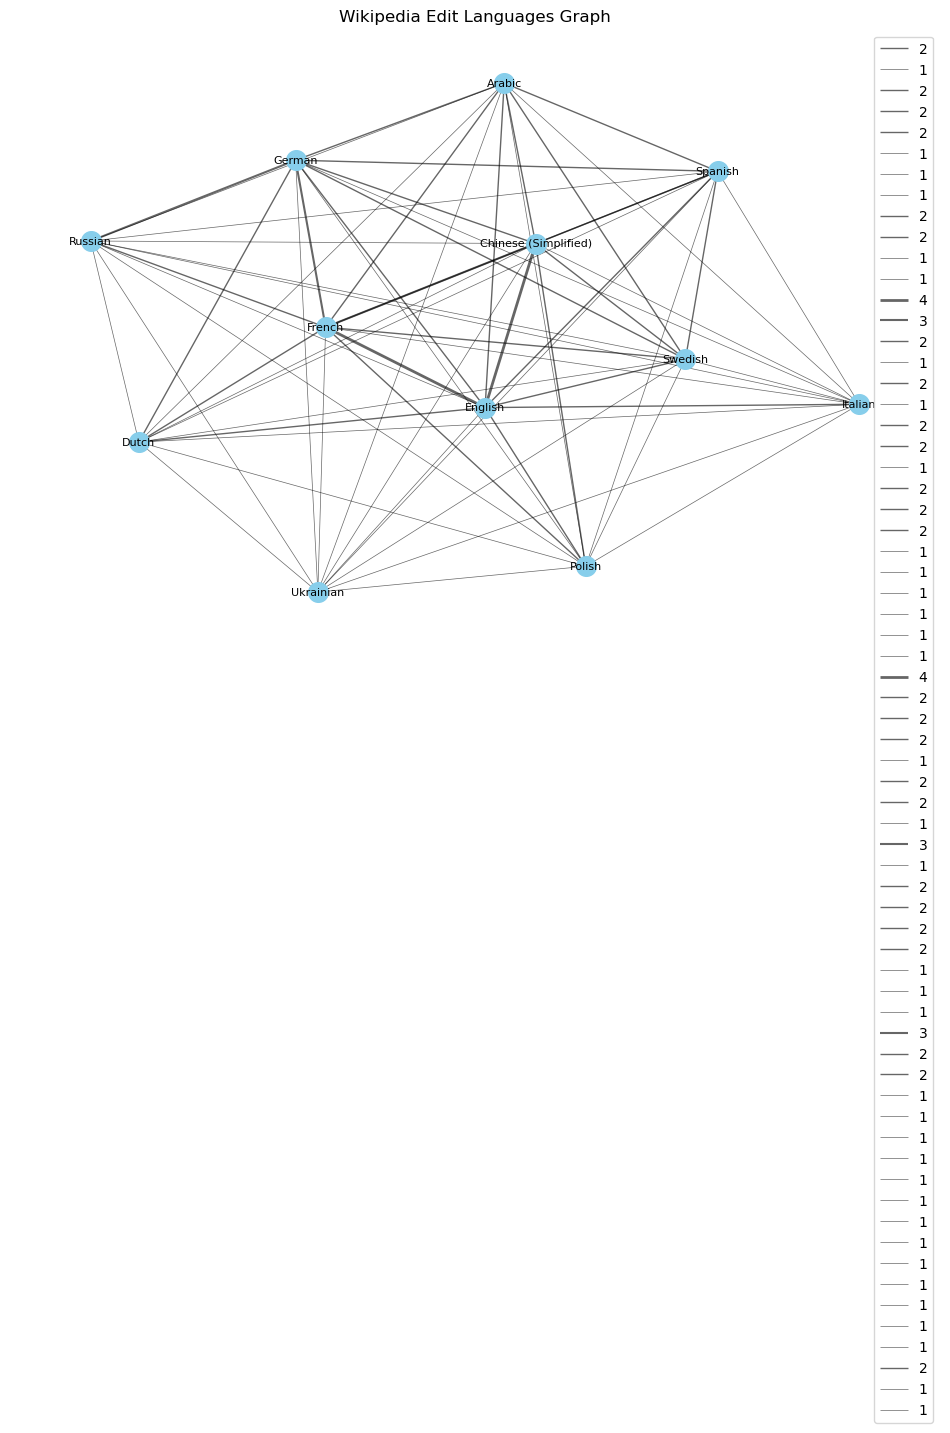

In [38]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Define language codes and corresponding full names based on your list
languages = {
    'en': 'English',
    'de': 'German',
    'fr': 'French',
    'es': 'Spanish',
    'it': 'Italian',
    'nl': 'Dutch',
    'ru': 'Russian',
    'zh': 'Chinese (Simplified)',
    'ar': 'Arabic',
    'pt': 'Portuguese',
    'pl': 'Polish',
    'sv': 'Swedish',
    'uk': 'Ukrainian',
    'ja': 'Japanese',
    'fa': 'Persian',
    'tr': 'Turkish',
    'he': 'Hebrew',
    'ca': 'Catalan',
    'fi': 'Finnish',
    'no': 'Norwegian',
}

# Create a NetworkX graph
G = nx.Graph()

# Wikipedia edit data
wikipedia_edits = [
    "English;Spanish;Swedish;Chinese (Simplified);Arabic;Italian;Dutch;German;French;Polish;Russian;Ukrainian;Czech;Scots",
    "French;Breton",
    "German;Dutch",
    "",
    "French;English;Occitan;Spanish;Breton;Waray;Malay;Swedish;Chinese (Simplified);Latin;Arabic;Indonesian;Scots;Albanian;German;Czech;Luxembourgish",
    "English;Chinese (Simplified);Basque;Tajik;French;Polish",
    "Dutch;English;Limburgish;French",
    "German;Russian",
    "English;Swahili;Italian;Greek",
    "English;Chinese (Simplified);Basque",
    "French;German;Esperanto;Russian",
]

# Calculate edge weights
language_counts = {}

for line in wikipedia_edits:
    language_names = line.split(';')
    language_names = [name for name in language_names if name in languages.values()]
    language_names.sort()

    for i in range(len(language_names)):
        for j in range(i + 1, len(language_names)):
            key = (language_names[i], language_names[j])
            language_counts[key] = language_counts.get(key, 0) + 1

# Add nodes and edges to the graph
for lang1, lang2 in language_counts:
    weight = language_counts[(lang1, lang2)]
    G.add_edge(lang1, lang2, weight=weight)

# Create a layout for the graph using spring_layout
pos = nx.spring_layout(G, seed=42)

# Draw the graph with adjusted parameters
plt.figure(figsize=(12, 8))

nx.draw_networkx_nodes(G, pos, node_size=200, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=8)

# Draw edges with weights
for (u, v, d) in G.edges(data=True):
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=d['weight']*0.5, alpha=0.6, label=f"{d['weight']}")

# Create legend
legend_labels = {code: name for code, name in languages.items() if code in G.nodes}
nx.draw_networkx_nodes(G, pos, nodelist=legend_labels.keys(), node_size=1, alpha=0.0)
for code, name in legend_labels.items():
    plt.text(pos[code][0], pos[code][1], name, fontsize=8)

# Print edge weights table
df = pd.DataFrame([(u, v, d['weight']) for u, v, d in G.edges(data=True)], columns=['Language 1', 'Language 2', 'Weight'])
print(df)
df.to_csv('edge_weights.csv', index=False)
plt.axis('off')
plt.title('Wikipedia Edit Languages Graph')
plt.legend()
plt.show()


C:\Users\josep\AppData\Local\Temp\ipykernel_9540\1198370104.py:83: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=d['weight']*0.5, alpha=0.6, label=f"{d['weight']}")


    Language 1            Language 2  Weight
0       Arabic                Breton       2
1       Arabic  Chinese (Simplified)       2
2       Arabic                 Czech       2
3       Arabic               English       2
4       Arabic            Indonesian       2
..         ...                   ...     ...
157     Basque                Polish       1
158     Basque                 Tajik       1
159     Polish                 Tajik       1
160    Russian             Esperanto       1
161    Italian               Swahili       1

[162 rows x 3 columns]


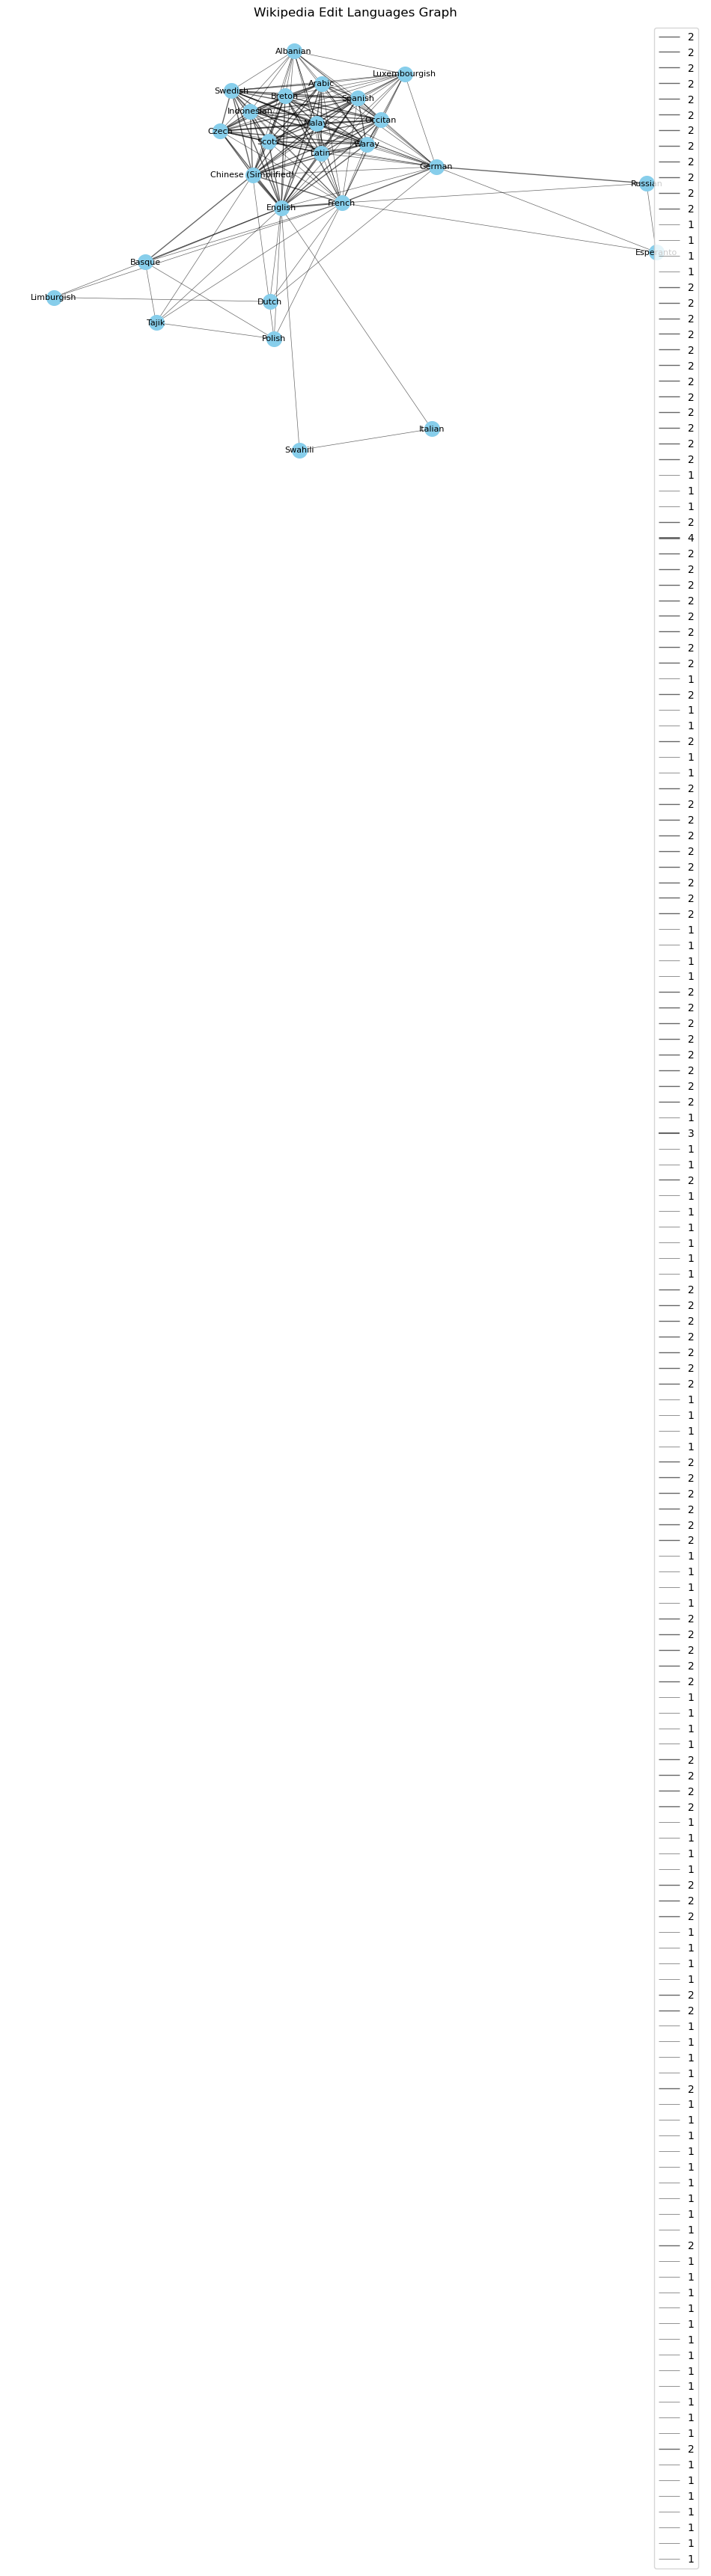

In [37]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

# Define language codes and corresponding full names
languages = {
    'en': 'English',
    'de': 'German',
    'fr': 'French',
    'es': 'Spanish',
    'it': 'Italian',
    'nl': 'Dutch',
    'ru': 'Russian',
    'zh': 'Chinese (Simplified)',
    'ar': 'Arabic',
    'pt': 'Portuguese',
    'pl': 'Polish',
    'sv': 'Swedish',
    'eu': 'Basque',
    'tg': 'Tajik',
    'ms': 'Malay',
    'war': 'Waray',
    'br': 'Breton',
    'oc': 'Occitan',
    'id': 'Indonesian',
    'cs': 'Czech',
    'pc': 'Scots',
    'lb': 'Luxembourgish',
    'sq': 'Albanian',
    'li': 'Limburgish',
    'sw': 'Swahili',
    'la': 'Latin',
    'eo': 'Esperanto',
}

# Create a NetworkX graph
G = nx.Graph()

# Wikipedia edit data
wikipedia_edits = [
    "English;Spanish;Waray;Breton;Occitan;Malay;Swedish;Chinese (Simplified);Latin;Arabic;Indonesian;Czech;Scots",
    "French;Breton",
    "German;Dutch",
    "",
    "French;English;Occitan;Spanish;Breton;Waray;Malay;Swedish;Chinese (Simplified);Latin;Arabic;Indonesian;Scots;Albanian;German;Czech;Luxembourgish",
    "English;Chinese (Simplified);Basque;Tajik;French;Polish",
    "Dutch;English;Limburgish;French",
    "German;Russian",
    "English;Swahili;Italian;Greek",
    "English;Chinese (Simplified);Basque",
    "French;German;Esperanto;Russian",
]

# Calculate edge weights
language_counts = {}

for line in wikipedia_edits:
    language_names = line.split(';')
    language_names = [name for name in language_names if name in languages.values()]
    language_names.sort()

    for i in range(len(language_names)):
        for j in range(i + 1, len(language_names)):
            key = (language_names[i], language_names[j])
            language_counts[key] = language_counts.get(key, 0) + 1

# Add nodes and edges to the graph
for lang1, lang2 in language_counts:
    weight = language_counts[(lang1, lang2)]
    G.add_edge(lang1, lang2, weight=weight)

# Create a layout for the graph using spring_layout
pos = nx.spring_layout(G, seed=42)

# Draw the graph with adjusted parameters
plt.figure(figsize=(12, 8))

nx.draw_networkx_nodes(G, pos, node_size=200, node_color='skyblue')
nx.draw_networkx_labels(G, pos, font_size=8)

# Draw edges with weights
for (u, v, d) in G.edges(data=True):
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], width=d['weight']*0.5, alpha=0.6, label=f"{d['weight']}")

# Create legend
legend_labels = {code: name for code, name in languages.items() if code in G.nodes}
nx.draw_networkx_nodes(G, pos, nodelist=legend_labels.keys(), node_size=1, alpha=0.0)
for code, name in legend_labels.items():
    plt.text(pos[code][0], pos[code][1], name, fontsize=8)

# Print edge weights table
df = pd.DataFrame([(u, v, d['weight']) for u, v, d in G.edges(data=True)], columns=['Language 1', 'Language 2', 'Weight'])
print(df)
df.to_csv('edge_weights.csv', index=False)
plt.axis('off')
plt.title('Wikipedia Edit Languages Graph')
plt.legend()
plt.show()
